<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Chocolate Gummy Bears](#Q2)
    - Perceptron
    - Multilayer Perceptron
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Define the following terms:

- **Neuron:**

ANN's are computational models inspired by neural networks in the brain.  The neurons or "nodes" receive inputs and pass on their signal to the next layer of nodes if a certain threshold is reached.

- **Input Layer:**

ANN's are composed of three types of layers - input, hidden and output layers. The input layer receives inputs from the dataset and is exposed to the dataset. 

- **Hidden Layer:**

The hidden layer in not exposed directly to the data and consists of weights and calculations used to analyze the data.

- **Output Layer:**

The output layer represents the results or output of the model. 

- **Activation:**

In a NN each node has an activation function. An activation function decides how much signal to pass to the next layer.

- **Backpropagation:**

In order to evaluate a NN's performance, data is "fed forward" until predictions are obtained and then the "loss" or "error" for a given observation is ascertained by looking at what the network predicted for that observation and comparing it to what it should have predicted.

The error for a given observation is calculated by taking the square of the difference between the predicted value and the actual value. The overall quality of a network's predictions can be found by finding the average error across all observations. This gives us the "Mean Squared Error."

An "epoch" is one cycle of passing our data forward through the network, measuring the error given our specified cost function, and then, via gradient descent, updating weights within our network to hopefully improve the quality of our predictions on the next iteration.

Backpropagation refers to a specific algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch.

4 steps for backpropagation:

1 - Calculate Error for a given each observation

2 - Does the error indicate that I'm overestimating or underestimating in my prediction?

3 - Look at final layer weights to get an idea for which weights are helping pass desireable signals and which are stifling desireable signals.

4 - Also go to the previous layer and see what can be done to boost activations that are associated with helpful weights, and limit activations that are associated with unhelpful weights.


## 2. Chocolate Gummy Bears <a id="Q2"></a>

Right now, you're probably thinking, "yuck, who the hell would eat that?". Great question. Your candy company wants to know too. And you thought I was kidding about the [Chocolate Gummy Bears](https://nuts.com/chocolatessweets/gummies/gummy-bears/milk-gummy-bears.html?utm_source=google&utm_medium=cpc&adpos=1o1&gclid=Cj0KCQjwrfvsBRD7ARIsAKuDvMOZrysDku3jGuWaDqf9TrV3x5JLXt1eqnVhN0KM6fMcbA1nod3h8AwaAvWwEALw_wcB). 

Let's assume that a candy company has gone out and collected information on the types of Halloween candy kids ate. Our candy company wants to predict the eating behavior of witches, warlocks, and ghosts -- aka costumed kids. They shared a sample dataset with us. Each row represents a piece of candy that a costumed child was presented with during "trick" or "treat". We know if the candy was `chocolate` (or not chocolate) or `gummy` (or not gummy). Your goal is to predict if the costumed kid `ate` the piece of candy. 

If both chocolate and gummy equal one, you've got a chocolate gummy bear on your hands!?!?!
![Chocolate Gummy Bear](https://ed910ae2d60f0d25bcb8-80550f96b5feb12604f4f720bfefb46d.ssl.cf1.rackcdn.com/3fb630c04435b7b5-2leZuM7_-zoom.jpg)

In [1]:
import pandas as pd
candy = pd.read_csv('https://raw.githubusercontent.com/JimKing100/DS-Unit-4-Sprint-2-Neural-Networks/master/chocolate_gummy_bears.csv')

In [2]:
candy.head()

,chocolate,gummy,ate
0,0,1,1
1,1,0,1
2,0,1,1
3,0,0,0
4,1,1,0


### Perceptron

To make predictions on the `candy` dataframe. Build and train a Perceptron using numpy. Your target column is `ate` and your features: `chocolate` and `gummy`. Do not do any feature engineering. :P

Once you've trained your model, report your accuracy. You will not be able to achieve more than ~50% with the simple perceptron. Explain why you could not achieve a higher accuracy with the *simple perceptron* architecture, because it's possible to achieve ~95% accuracy on this dataset. Provide your answer in markdown (and *optional* data anlysis code) after your perceptron implementation. 

In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

In [4]:
# Start your candy perceptron here
X = candy[['chocolate', 'gummy']].values
y = candy['ate'].values

In [5]:
# The function np.exp(-x) is e**-x
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_derivate(x):
  sx = sigmoid(x)
  return sx * (1-sx)

In [6]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, niter = 10000):
        self.niter = niter
    
    def __sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def predict(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(X.shape[1])

        for i in range(self.niter):
            # Weighted sum of inputs / weights
            weighted_sum = np.dot(X, self.weight)

            # Activate!
            activated_output = sigmoid(weighted_sum)

            # Calc error
            error = y - activated_output
            adjustments = error * sigmoid_derivate(activated_output)

            # Update the Weights
            self.weight += np.dot(X.T, adjustments)

        return activated_output

In [7]:
pn = Perceptron()
y_pred = pn.predict(X, y)
test = y_pred.astype(int)
test
accuracy_score(y, test)

/Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.5

The simple perceptron uses only forward-feed and does not use the loss to improve the accuracy with backpropagation.

### Multilayer Perceptron <a id="Q3"></a>

Using the sample candy dataset, implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. Your Multilayer Perceptron should be implemented in Numpy. 
Your network must have one hidden layer.

Once you've trained your model, report your accuracy. Explain why your MLP's performance is considerably better than your simple perceptron's on the candy dataset. 

In [8]:
y = y.reshape(10000, 1)

In [9]:
# I want activations that correspond to negative weights to be lower
# and activations that correspond to positive weights to be higher

class NeuralNetwork:
    def __init__(self):
        # Set up Architecture of Neural Network
        self.inputs = 2
        self.hiddenNodes = 1
        self.outputNodes = 1

        # Initial Weights
        # 2x1 Matrix Array for the First Layer
        self.weights1 = np.random.rand(self.inputs, self.hiddenNodes)
       
        # 1x1 Matrix Array for Hidden to Output
        self.weights2 = np.random.rand(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        return s * (1 - s)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        aka "predict"
        """
        
        # Weighted sum of inputs => hidden layer
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activations of weighted sum
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weight sum between hidden and output
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final activation of output
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
        
    def backward(self, X,y,o):
        """
        Backward propagate through the network
        """
        
        # Error in Output
        self.o_error = y - o
        
        # Apply Derivative of Sigmoid to error
        # How far off are we in relation to the Sigmoid f(x) of the output
        # ^- aka hidden => output
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # How much of that "far off" can explained by the input => hidden
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)
        
        # Adjustment to first set of weights (input => hidden)
        self.weights1 += X.T.dot(self.z2_delta)
        # Adjustment to second set of weights (hidden => output)
        self.weights2 += self.activated_hidden.T.dot(self.o_delta)
        

    def train(self, X, y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

In [10]:
nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(5000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 1000 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[0.55703286]
 [0.57084951]
 [0.55703286]
 ...
 [0.55703286]
 [0.55703286]
 [0.57084951]]
Loss: 
 0.25401782264143047
+---------EPOCH 2---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[0.01007405]
 [0.44754282]
 [0.01007405]
 ...
 [0.01007405]
 [0.01007405]
 [0.44754282]]
Loss: 
 0.3819209627733153
+---------EPOCH 3---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]
Loss: 
 0.20115
+---------EPOCH 4---------+
Input: 
 [[0 1]
 [1 0]
 [0 1]
 ...
 [0 1]
 [0 1]
 [1 0]]
Actual Output: 
 [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]
Predicted Output: 
 [[0.5]
 [0.5]
 [0.5]
 ...
 [0.5]
 [0.5]
 [0.5]]
Loss: 
 0.20115
+----

The MLP uses backprogagation to improve the performance.  

P.S. Don't try candy gummy bears. They're disgusting. 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1


In [64]:
# Transfer to array
train = df.values

In [65]:
# Train, test split
train, test = train_test_split(train, train_size=0.90, test_size=0.10, random_state=42)
print(train.shape, test.shape)

(272, 14) (31, 14)


In [66]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(train[:,0:13])
Y = train[:,13]
X_test = scaler.fit_transform(test[:,0:13])
Y_test = test[:,13]

In [70]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
    return model

In [71]:
model = create_model()

In [72]:
history = model.fit(X, Y, validation_data=(X_test, Y_test), epochs=100, batch_size=10)

Train on 272 samples, validate on 31 samples
Epoch 1/100
272/272 [==============================] - 2s 6ms/sample - loss: 0.7061 - acc: 0.5257 - val_loss: 0.5575 - val_acc: 0.7419
Epoch 2/100
272/272 [==============================] - 0s 470us/sample - loss: 0.6470 - acc: 0.5993 - val_loss: 0.5246 - val_acc: 0.7742
Epoch 3/100
272/272 [==============================] - 0s 418us/sample - loss: 0.6272 - acc: 0.6434 - val_loss: 0.4994 - val_acc: 0.7742
Epoch 4/100
272/272 [==============================] - 0s 383us/sample - loss: 0.5668 - acc: 0.7353 - val_loss: 0.4700 - val_acc: 0.9032
Epoch 5/100
272/272 [==============================] - 0s 454us/sample - loss: 0.6093 - acc: 0.7243 - val_loss: 0.4457 - val_acc: 0.9032
Epoch 6/100
272/272 [==============================] - 0s 443us/sample - loss: 0.5278 - acc: 0.7426 - val_loss: 0.4219 - val_acc: 0.9355
Epoch 7/100
272/272 [==============================] - 0s 435us/sample - loss: 0.5487 - acc: 0.7721 - val_loss: 0.4042 - val_acc: 0.935

272/272 [==============================] - 0s 407us/sample - loss: 0.3352 - acc: 0.8456 - val_loss: 0.3834 - val_acc: 0.9032
Epoch 61/100
272/272 [==============================] - 0s 384us/sample - loss: 0.3261 - acc: 0.8529 - val_loss: 0.3852 - val_acc: 0.9032
Epoch 62/100
272/272 [==============================] - 0s 374us/sample - loss: 0.3352 - acc: 0.8566 - val_loss: 0.3834 - val_acc: 0.9032
Epoch 63/100
272/272 [==============================] - 0s 759us/sample - loss: 0.3249 - acc: 0.8713 - val_loss: 0.3867 - val_acc: 0.9032
Epoch 64/100
272/272 [==============================] - 0s 516us/sample - loss: 0.3112 - acc: 0.8603 - val_loss: 0.3842 - val_acc: 0.9032
Epoch 65/100
272/272 [==============================] - 0s 549us/sample - loss: 0.3231 - acc: 0.8750 - val_loss: 0.3875 - val_acc: 0.9032
Epoch 66/100
272/272 [==============================] - 0s 448us/sample - loss: 0.3318 - acc: 0.8676 - val_loss: 0.3870 - val_acc: 0.9032
Epoch 67/100
272/272 [=========================

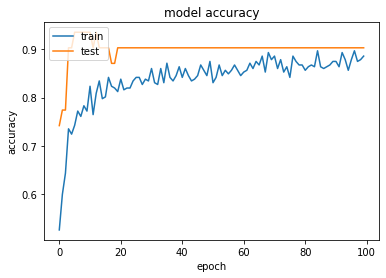

In [73]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Hyperparameter Tuning - Batch Size

In [78]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss = "binary_crossentropy", optimizer = 'adam', metrics=['accuracy'])
    return model

In [79]:
model = KerasClassifier(build_fn=create_model, verbose=0)

In [80]:
param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [100]}

In [81]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

In [82]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8161764815449715 using {'batch_size': 20, 'epochs': 100}
Means: 0.7867647087311044, Stdev: 0.021792655265557744 with: {'batch_size': 10, 'epochs': 100}
Means: 0.8161764815449715, Stdev: 0.00994365454561476 with: {'batch_size': 20, 'epochs': 100}
Means: 0.8014706000685692, Stdev: 0.030662076028443567 with: {'batch_size': 40, 'epochs': 100}
Means: 0.7977941198384061, Stdev: 0.030786093614443025 with: {'batch_size': 60, 'epochs': 100}
Means: 0.8014706000685692, Stdev: 0.01713915319711339 with: {'batch_size': 80, 'epochs': 100}
Means: 0.7904411889612675, Stdev: 0.022796230352717686 with: {'batch_size': 100, 'epochs': 100}


### Hyperparameter Tuning - Optimizer

In [87]:
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
          
    model.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])
    return model

In [88]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [89]:
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)

In [90]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

W0208 10:37:56.466106 4445314496 deprecation.py:506] From /Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
/Users/JKMacBook/opt/anaconda3/envs/NN/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [91]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8088235408067703 using {'optimizer': 'Nadam'}
Means: 0.7977941198384061, Stdev: 0.03676671414234221 with: {'optimizer': 'SGD'}
Means: 0.8051470605766072, Stdev: 0.01982087875079266 with: {'optimizer': 'RMSprop'}
Means: 0.6066176606451764, Stdev: 0.060024674556218155 with: {'optimizer': 'Adagrad'}
Means: 0.47426471738692594, Stdev: 0.11248907329769656 with: {'optimizer': 'Adadelta'}
Means: 0.7977941198384061, Stdev: 0.02499154643088906 with: {'optimizer': 'Adam'}
Means: 0.7169117815792561, Stdev: 0.035262950168783766 with: {'optimizer': 'Adamax'}
Means: 0.8088235408067703, Stdev: 0.00620480121611568 with: {'optimizer': 'Nadam'}


### Hyperparameter Tuning - Activation Function

In [96]:
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(16, input_dim=13, activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation=activation))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss = "binary_crossentropy", optimizer = 'Nadam', metrics=['accuracy'])
    return model

In [97]:
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

In [98]:
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)

In [99]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, Y)

In [100]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.8272058827912107 using {'activation': 'hard_sigmoid'}
Means: 0.7977941198384061, Stdev: 0.03676671414234221 with: {'activation': 'softmax'}
Means: 0.8088235408067703, Stdev: 0.02029734564007827 with: {'activation': 'softplus'}
Means: 0.7977941296994686, Stdev: 0.013572387090618037 with: {'activation': 'softsign'}
Means: 0.794117659330368, Stdev: 0.019763440910590686 with: {'activation': 'relu'}
Means: 0.8088235309457078, Stdev: 0.02188304086101027 with: {'activation': 'tanh'}
Means: 0.8235294124221101, Stdev: 0.03181525288522948 with: {'activation': 'sigmoid'}
Means: 0.8272058827912107, Stdev: 0.033535791310007314 with: {'activation': 'hard_sigmoid'}
Means: 0.794117659330368, Stdev: 0.026717031340633177 with: {'activation': 'linear'}
